In [245]:
# Regression Tree & Random Forest

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [247]:
# Importing the dataset
df = pd.read_csv('benzin_prep.csv', sep=';')

In [248]:
df

,Date,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
0,2017-01-03,23.82,27.190858,28.422604,55.64,57.611681
1,2017-01-04,23.85,27.190858,28.422604,56.25,57.571419
2,2017-01-05,23.85,26.692366,27.858822,56.77,57.532696
3,2017-01-06,23.87,26.286719,27.603684,56.82,57.496014
4,2017-01-10,23.87,27.020929,28.612462,53.64,57.379405
...,...,...,...,...,...,...
877,2020-07-27,22.87,27.755900,32.224600,43.95,77.059356
878,2020-07-28,22.87,27.757100,32.604900,43.65,76.648569
879,2020-07-29,22.87,27.685100,32.453900,44.10,76.239853
880,2020-07-30,22.89,27.686700,32.469600,43.61,75.834026


In [249]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 2:6].values
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [250]:
# Fitting Tree to the Training set (Oil_price)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 15).fit(X_train[:, 2:3], y_train)

In [251]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 2:3])

In [252]:
# Coefficient of determination R^2
train_mod = []
train_mod.append(sdt.score(X_train[:, 2:3], y_train))
test_mod = []
test_mod.append(sdt.score(X_test[:, 2:3], y_test))
sdt.score(X_train[:, 2:3], y_train), sdt.score(X_test[:, 2:3], y_test)

(0.8349427005537816, 0.7811502695623134)

In [253]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse =[]
train_mse.append(mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])))
test_mse = []
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(1.2418724896250803, 1.467419812142635)

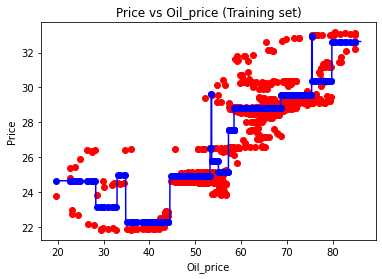

In [254]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sdt.predict(X_train[:, 2:3]), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

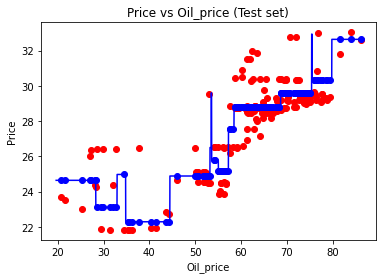

In [255]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sdt.predict(X_test[:, 2:3]), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [256]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_leaf_nodes = 15).fit(X_train, y_train)

In [257]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [258]:
# Coefficient of determination R^2
train_mod.append(dt.score(X_train, y_train))
test_mod.append(dt.score(X_test, y_test))
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9495386285405414, 0.9001905439931794)

In [259]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dt.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.37966566286075054, 0.6692371651117466)

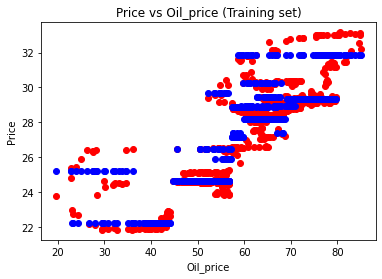

In [260]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

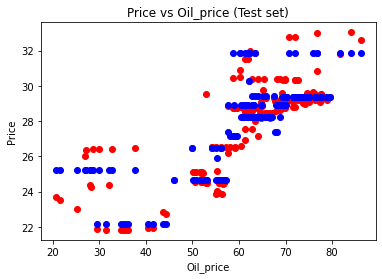

In [261]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [262]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 15, random_state = 0).fit(X_train, y_train)

In [263]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [264]:
# Coefficient of determination R^2
train_mod.append(rf.score(X_train, y_train))
test_mod.append(rf.score(X_test, y_test))
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9965571659985741, 0.9609637725823044)

In [265]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dt.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.025903494405043307, 0.2617436785938478)

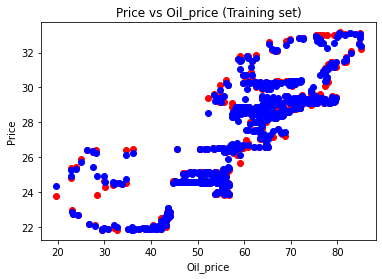

In [266]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rf.predict(X_train), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

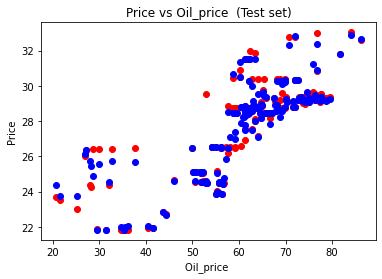

In [267]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], rf.predict(X_test), 'bo')
plt.title('Price vs Oil_price  (Test set)')
plt.xlabel('Oil_price ')
plt.ylabel('Price')
plt.show()

In [268]:
# Fitting Tree to the Training set (with optimized factors)
from sklearn.tree import DecisionTreeRegressor
dl = DecisionTreeRegressor(max_leaf_nodes = 15).fit(X_train[:, [0,2,3]], y_train)

In [269]:
# Predicting the Test set results
y_pred = dl.predict(X_test[:, [0,2,3]])

In [270]:
# Coefficient of determination R^2
train_mod.append(dl.score(X_train[:, [0,2,3]], y_train))
test_mod.append(dl.score(X_test[:, [0,2,3]], y_test))
dl.score(X_train[:, [0,2,3]], y_train), dl.score(X_test[:, [0,2,3]], y_test)

(0.9414683122715255, 0.9007303399341305)

In [271]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dl.predict(X_train[:, [0,2,3]])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dl.predict(X_train[:, [0,2,3]])), mean_squared_error(y_test, y_pred)

(0.4403858115042226, 0.665617753487699)

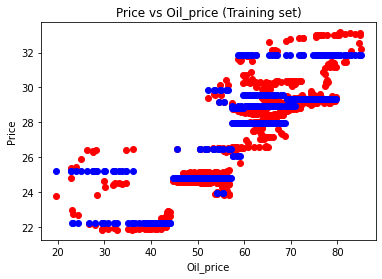

In [272]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dl.predict(X_train[:, [0,2,3]]), 'bo')
plt.title('Price vs Oil_price (Training set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

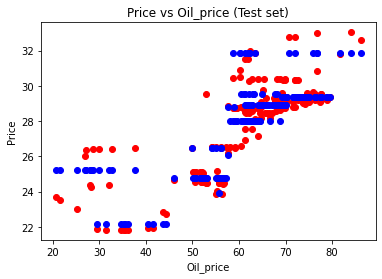

In [273]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dl.predict(X_test[:, [0,2,3]]), 'bo')
plt.title('Price vs Oil_price (Test set)')
plt.xlabel('Oil_price')
plt.ylabel('Price')
plt.show()

In [274]:
# Creating dataset with metrics
model=['sdt', 'dt', 'rf', 'dl']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=train_mod
metrics_df['test_r2']=test_mod
metrics_df['train_mse']=train_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sdt,0.834943,0.781150,1.241872,1.467420
1,dt,0.949539,0.900191,0.379666,0.669237
2,rf,0.996557,0.960964,0.379666,0.261744
3,dl,0.941468,0.900730,0.440386,0.665618
